In [1]:
import pandas as pd
import datetime
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


**Reading and Loading the data from excel**

In [2]:
df = pd.read_excel("C:/Users/laasy/Documents/Fall 2023/Intro to Informatics/Project/Data Cleaning/Patient No show.xlsx")

 # Data Cleaning

**Handling the Patiend Id format**

The Patient ID values are displaying in the scentific notion so this has to be changed into Standard Notation

In [3]:
print(df.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [4]:
pd.set_option('display.float_format', lambda x: '%.f' % x)

In [5]:
print(df.head())

        PatientId  AppointmentID Gender          ScheduledDay  \
0  29872499824296        5642903      F  2016-04-29T18:38:08Z   
1 558997776694438        5642503      M  2016-04-29T16:08:27Z   
2   4262962299951        5642549      F  2016-04-29T16:19:04Z   
3    867951213174        5642828      F  2016-04-29T17:29:31Z   
4   8841186448183        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0   

**Cleaning the columns**

In [6]:
# PatientId should be int64, not float64
df['PatientId'] = df['PatientId'].astype('int64')

# Convert ScheduledDay and AppointmentDay to datetime64[ns]
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [7]:
# check the head of dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Renaming the coloumns as there are typo errors** 

In [8]:
df.rename(columns={"Hipertension": "Hypertension","Handcap":"Handicap",
                      "SMS_received": "SMSReceived", "No-show": "NoShow"},inplace=True)

**checking the typos within the Neighbourhood coloumn**

In [9]:
# check for typos
print(sorted(df['Neighbourhood'].unique()))

['AEROPORTO', 'ANDORINHAS', 'ANTÃ”NIO HONÃ“RIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÃ\x8dRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÃ‡ÃƒO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÃ\x81', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃƒO JOÃƒO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÃ“RIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÃ\x8dNCIPE', 'ILHAS OCEÃ‚NICAS DE TRINDADE', 'INHANGUETÃ\x81', 'ITARARÃ‰', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA DÂ´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÃ\x8dPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÃ\x81RIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÃ\x81', 'REDENÃ‡ÃƒO', 'REPÃšBLICA', 'RESISTÃŠNCIA', 'ROMÃƒO', 'SANTA CECÃ

**Handling the Missing values**

In [10]:
# Handle missing values
df = df.fillna(method='ffill')

C:\Users\laasy\AppData\Local\Temp\ipykernel_52816\132356397.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [11]:
print(df.isna().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSReceived       0
NoShow            0
dtype: int64


**Processing the Date format of Scheduled Day and Appointment Day**

Changing the date format for the Appointment day and scheduled day from " 2016-04-29T18:38:08Z" format into the "%Y-%m-%d %H:%M:%S" format

In [12]:
print(df.head())

         PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0   29872499824296        5642903      F   2016-04-29     2016-04-29   62   
1  558997776694438        5642503      M   2016-04-29     2016-04-29   56   
2    4262962299951        5642549      F   2016-04-29     2016-04-29   62   
3     867951213174        5642828      F   2016-04-29     2016-04-29    8   
4    8841186448183        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handicap  SMSReceived NoShow  
0         0            0     No  
1         0            0     N

In [13]:
# Parse date columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.strftime('%Y-%m-%d %H:%M:%S')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.strftime('%Y-%m-%d %H:%M:%S')


In [14]:
print(df.head())

         PatientId  AppointmentID Gender         ScheduledDay  \
0   29872499824296        5642903      F  2016-04-29 00:00:00   
1  558997776694438        5642503      M  2016-04-29 00:00:00   
2    4262962299951        5642549      F  2016-04-29 00:00:00   
3     867951213174        5642828      F  2016-04-29 00:00:00   
4    8841186448183        5642494      F  2016-04-29 00:00:00   

        AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29 00:00:00   62    JARDIM DA PENHA            0             1   
1  2016-04-29 00:00:00   56    JARDIM DA PENHA            0             0   
2  2016-04-29 00:00:00   62      MATA DA PRAIA            0             0   
3  2016-04-29 00:00:00    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29 00:00:00   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMSReceived NoShow  
0         0           0         0            0     No  
1         0           0         0 

**Removing Outliers**

In [15]:
# Assuming you already have the DataFrame loaded, you can use this line to filter the rows
filtered_df = df[df['Age'] < 1]

# Print the filtered rows
print(filtered_df)

              PatientId  AppointmentID Gender         ScheduledDay  \
59       71844284745331        5638545      F  2016-04-29 00:00:00   
63      236623344873175        5628286      M  2016-04-27 00:00:00   
64      188517384712787        5616082      M  2016-04-25 00:00:00   
65      271881817799985        5628321      M  2016-04-27 00:00:00   
67       86471282513499        5639264      F  2016-04-29 00:00:00   
...                 ...            ...    ...                  ...   
110345  147395196662956        5702537      F  2016-05-16 00:00:00   
110346    5577525313231        5777724      M  2016-06-06 00:00:00   
110454     614245995575        5772400      F  2016-06-03 00:00:00   
110460   43218463343323        5769545      F  2016-06-03 00:00:00   
110507  476946211846992        5786918      F  2016-06-08 00:00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
59      2016-04-29 00:00:00    0          CONQUISTA            0   
63      2016-04-29 00:0

In [16]:
# Count the number of rows where age is less than 1
count_less_than_1 = len(filtered_df)
print(f"Number of rows with age less than 1: {count_less_than_1}")

Number of rows with age less than 1: 3540


Removing all rows where Age is less than or equal to 0, removing any unrealistic age values that are likely outliers.

In [17]:
print(df['Age'].describe())


count   110527
mean        37
std         23
min         -1
25%         18
50%         37
75%         55
max        115
Name: Age, dtype: float64


In [18]:
# Removing rows where age is less than 1 and 115
df= df[(df['Age'] < 115) & (df['Age'] > 0)]

In [19]:
print(df['Age'].describe())

count   106982
mean        38
std         22
min          1
25%         19
50%         38
75%         56
max        102
Name: Age, dtype: float64


In [20]:
print(df['Age'].min())

1


In [21]:
print(df['Age'].max())

102


# Exploratory Data Analysis

C:\Users\laasy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\laasy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\laasy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='Gender', ylabel='count'>

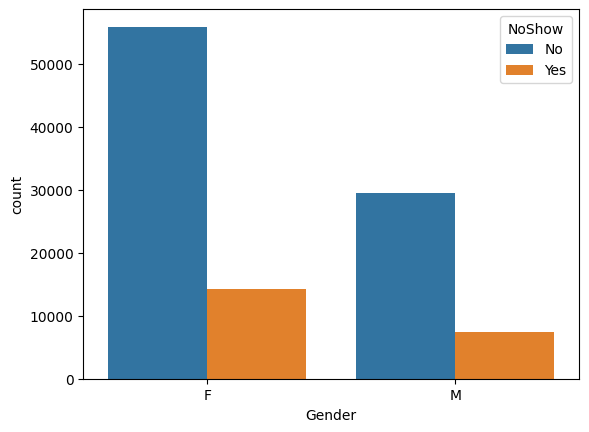

In [22]:
sns.countplot(x='Gender', hue='NoShow', data=df)

C:\Users\laasy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\laasy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\laasy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

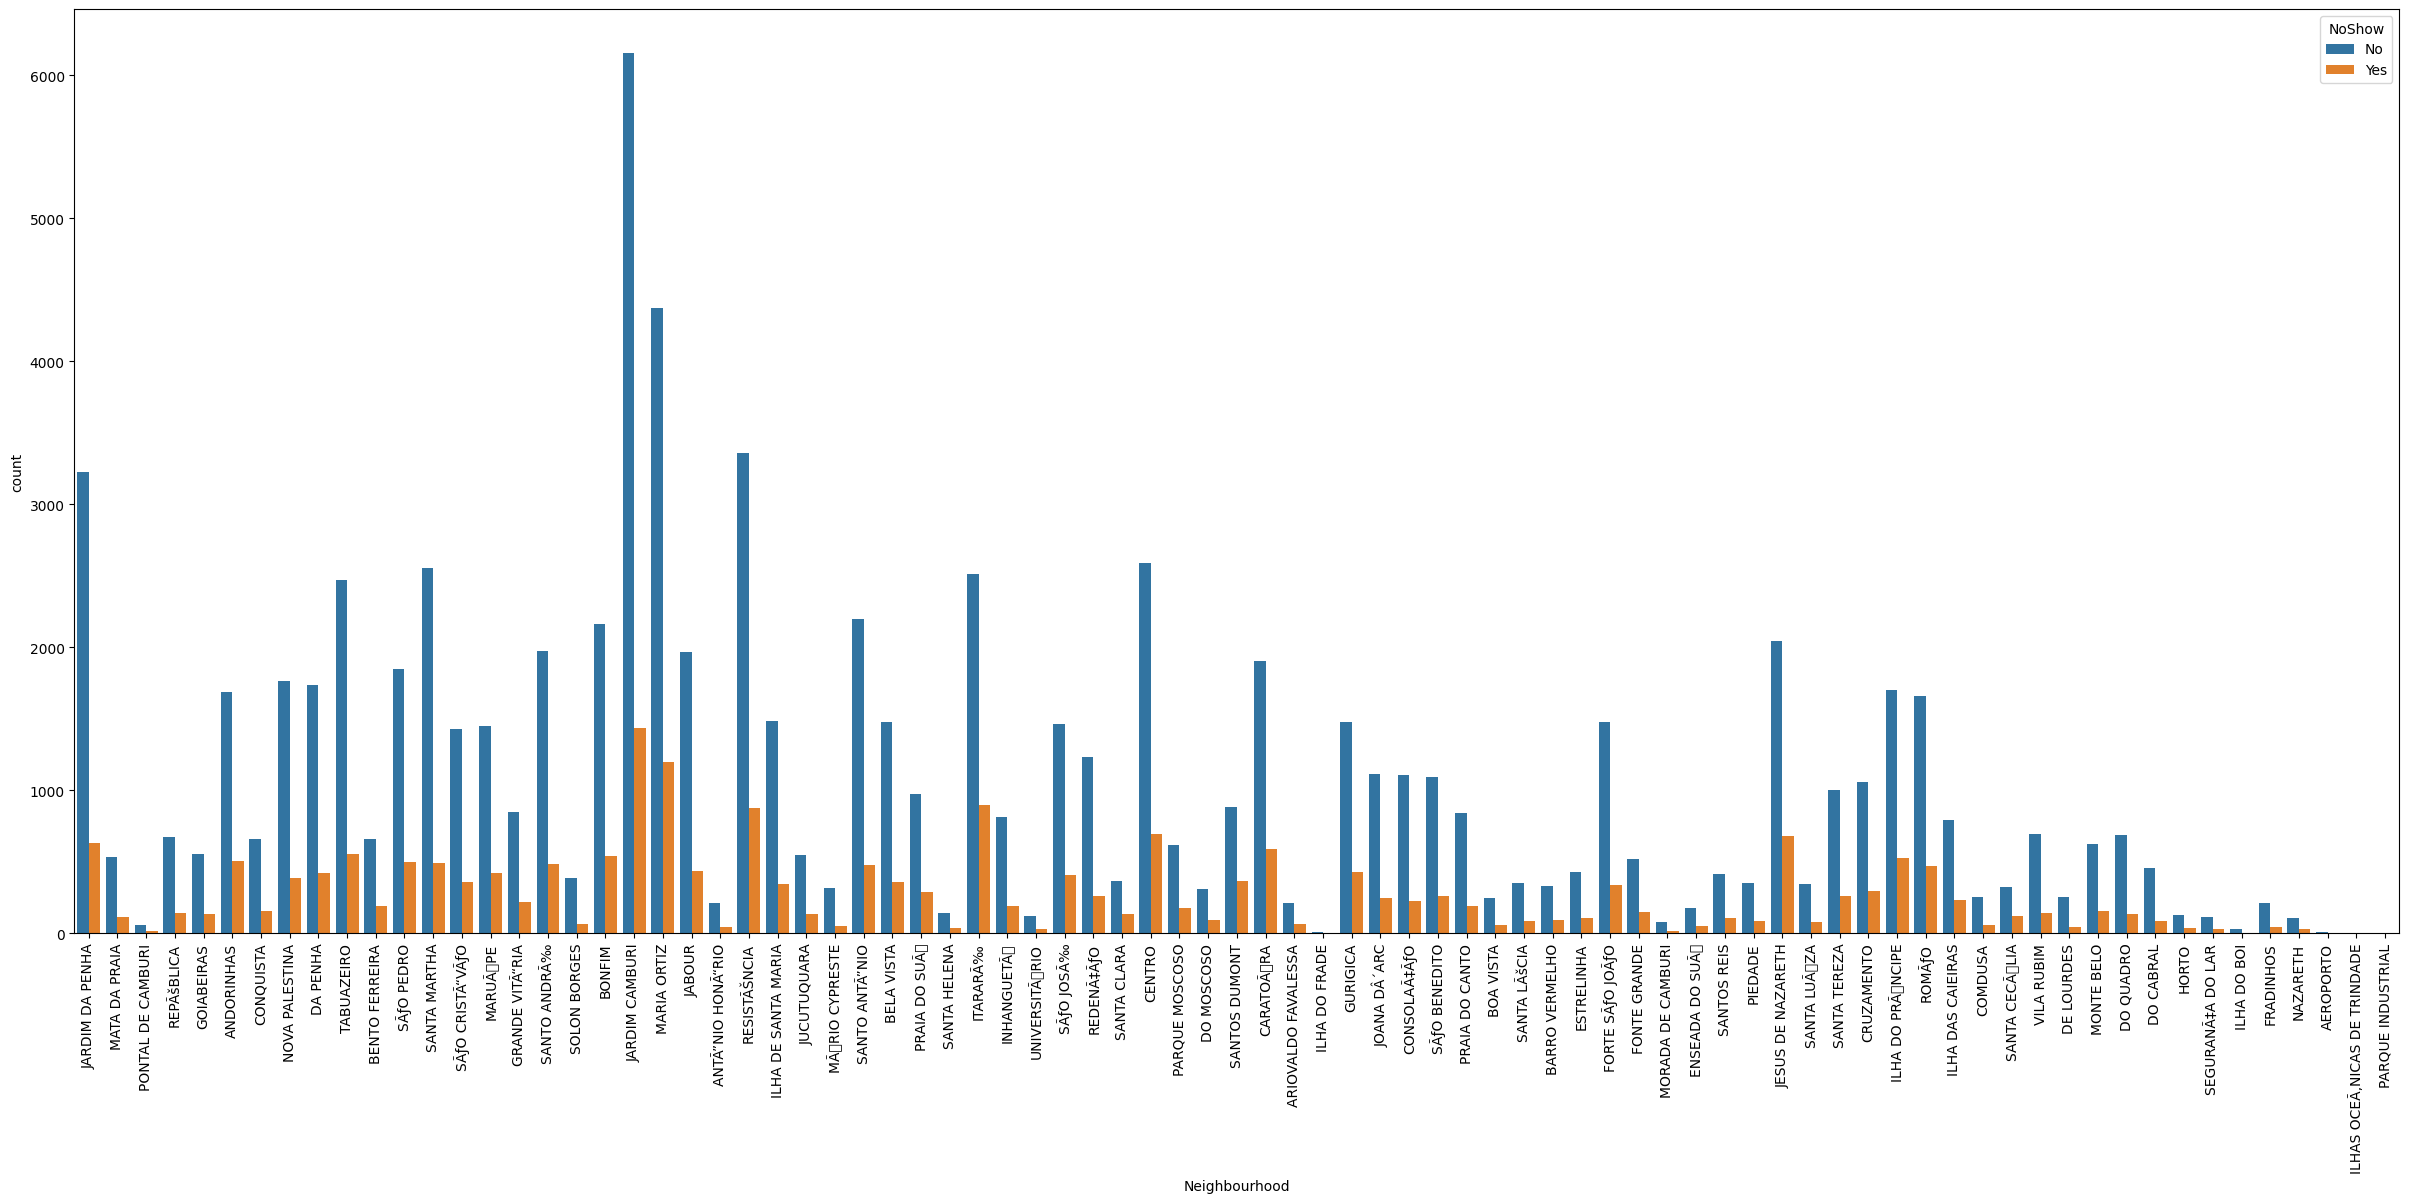

In [24]:
plt.figure(figsize=(30,12))
fig = sns.countplot(x='Neighbourhood',hue='NoShow',data=df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

# Data Preprocessing

Removing the Patient ID and Appointment ID as they are random generators

In [27]:
df = df.drop(['PatientId','AppointmentID'],axis=1)

**Handling the duplicates**

In [28]:
# Handle duplicates
df = df.drop_duplicates()

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99477 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          99477 non-null  object
 1   ScheduledDay    99477 non-null  object
 2   AppointmentDay  99477 non-null  object
 3   Age             99477 non-null  int64 
 4   Neighbourhood   99477 non-null  object
 5   Scholarship     99477 non-null  int64 
 6   Hypertension    99477 non-null  int64 
 7   Diabetes        99477 non-null  int64 
 8   Alcoholism      99477 non-null  int64 
 9   Handicap        99477 non-null  int64 
 10  SMSReceived     99477 non-null  int64 
 11  NoShow          99477 non-null  object
dtypes: int64(7), object(5)
memory usage: 9.9+ MB
None


In [30]:
print(df.duplicated().sum())

0


Cleaning the Schedlue day and Appointment Day coloumn

In [31]:
# Convert 'ScheduledDay' to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Now you can extract the desired datetime components
df['ScheduledMonth'] = df['ScheduledDay'].dt.month
df['ScheduledDayofWeek'] = df['ScheduledDay'].dt.day_name()
df['ScheduledHour'] = df['ScheduledDay'].dt.hour

# Display the first 5 rows
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledMonth,ScheduledDayofWeek,ScheduledHour
0,F,2016-04-29,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Friday,0
1,M,2016-04-29,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,Friday,0
2,F,2016-04-29,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,Friday,0
3,F,2016-04-29,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,Friday,0
4,F,2016-04-29,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,Friday,0


In [32]:
# Convert 'AppointmentDay' to datetime format
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['AppointmentMonth'] = df['AppointmentDay'].dt.month
df['AppointmentDayofWeek'] = df['AppointmentDay'].dt.day_name()
df['AppointmentHour'] = df['AppointmentDay'].dt.hour
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledMonth,ScheduledDayofWeek,ScheduledHour,AppointmentMonth,AppointmentDayofWeek,AppointmentHour
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Friday,0,4,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,Friday,0,4,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,Friday,0,4,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,Friday,0,4,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,Friday,0,4,Friday,0


In [33]:
df['AppointmentDayofWeek'] = df['AppointmentDay'].dt.weekday
df['ScheduledDayofWeek'] = df['ScheduledDay'].dt.weekday

Get dummy variables
Now I convert non-numeric variables to logical variables

In [36]:
df['NoShow'] = pd.get_dummies(df['NoShow'])['Yes']

In [37]:
no_show = len(df[df['NoShow'] == 1])
print(f'No-shows: {no_show}')

total = len(df)
print(f'Percentage no-show: {(no_show/total) * 100}')

No-shows: 20919
Percentage no-show: 21.028981573630084


To help with following plots, I now create a logical variable for gender

In [38]:
# skewed towards female entries
print(f"Gender entries: {df['Gender'].unique()}")
print(df['Gender'].describe())
df['Male'] = pd.get_dummies(df['Gender'])['M']
      
df = df.drop('Gender',axis=1)

Gender entries: ['F' 'M']
count     99477
unique        2
top           F
freq      65563
Name: Gender, dtype: object


In [39]:
# get dummy variables for neighbourhood
neighbourhoods = pd.get_dummies(df['Neighbourhood'])

# join dummy neighbourhood columns and drop string neighbourhood column
df = df.join(neighbourhoods).drop('Neighbourhood',axis=1)

Drop redundant variables
Now I drop the "AppointmentDay" "ScheduledDay" columns, as we have no more use for these

In [40]:
df = df.drop(['AppointmentDay','ScheduledDay'],axis=1)

Standardise Variables to prepare data for modelling.

In [41]:
# import StandardScaler from Scikit learn
from sklearn.preprocessing import StandardScaler

# create StandardScaler object
scaler = StandardScaler()

# fit scaler to features
scaler.fit(df.drop(['NoShow'],axis=1))

StandardScaler()

In [42]:
# use .transform() to transform features to scaled version
scaled_features = scaler.transform(df.drop('NoShow',axis=1))

In [43]:
df_feat = pd.DataFrame(scaled_features)
df_feat.head()

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,1,-0,2,-0,-0,-0,-1,-1,2,0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
1,1,-0,-1,-0,-0,-0,-1,-1,2,0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
2,1,-0,-1,-0,-0,-0,-1,-1,2,0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
3,-1,-0,-1,-0,-0,-0,-1,-1,2,0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
4,1,-0,2,3,-0,-0,-1,-1,2,0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


# Data Modeling

Machine learning Models 

In [97]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df_feat  # Features
y = df['NoShow']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

Decision Tree Model

In [98]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

# fit to data
dtree.fit(X_train,y_train)

# get predictions
dtree_pred = dtree.predict(X_test)

In [99]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

       False       0.81      0.82      0.82     23563
        True       0.29      0.28      0.28      6281

    accuracy                           0.71     29844
   macro avg       0.55      0.55      0.55     29844
weighted avg       0.70      0.71      0.70     29844





Precision:

•	Precision for the class "False" (NoShow) is 0.81. This means that out of all instances predicted as "NoShow," 81% are correct.
•	Precision for the class "True" (Show) is 0.29. This means that out of all instances predicted as "Show," 29% are correct.

Recall:

•	Recall for the class "False" (NoShow) is 0.82. This means that out of all actual "NoShow" instances, the model correctly identified 82% of them.
•	Recall for the class "True" (Show) is 0.28. This means that out of all actual "Show" instances, the model correctly identified 28% of them.

F1-Score:

•	The F1-score is the harmonic mean of precision and recall. It balances precision and recall into a single metric. F1-score for the class "False" is 0.82, and for the class "True" is 0.28.

Support:

•	The number of actual occurrences of each class in the specified dataset. For the class "False," there are 23563 instances, and for the class "True," there are 6281 instances.

Accuracy:

•	Overall accuracy of the model is 0.71, which means it correctly predicted the target variable in 71% of the cases.

Macro Avg:

•	The macro average of precision, recall, and F1-score across classes. It's calculated as the average of these metrics for each class independently. In this case, the macro average precision, recall, and F1-score are all 0.55.
Weighted Avg:

•	The weighted average of precision, recall, and F1-score, taking into account the number of occurrences of each class. It gives more weight to the class with a higher number of instances. In this case, the weighted average precision, recall, and F1-score are all 0.70.


In summary, the model performs reasonably well in predicting instances of "NoShow" (False) but has lower precision and recall for predicting instances of "Show" (True). Further tuning or consideration of the class imbalance may be necessary for improving performance on the "Show" class.


In [101]:
print("Confusion matrix:\n",confusion_matrix(y_test, dtree_pred))

Confusion matrix:
 [[19409  4154]
 [ 4552  1729]]


1729 are cases where the model predicted "NoShow" (1), and the actual outcome was also "NoShow."

19409 are cases where the model predicted "No NoShow" (0), and the actual outcome was also "No NoShow."

4154 are cases where the model predicted "NoShow" (1), but the actual outcome was "No NoShow."

4552 are cases where the model predicted "No NoShow" (0), but the actual outcome was "NoShow."

# Naive Bayes

In [102]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [103]:
y_pred = gnb.predict(X_test)

y_pred

array([ True, False, False, ..., False, False, False])

In [104]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7736


Check for overfitting and underfitting



In [105]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7754
Test set score: 0.7736
